

# Project: Analysis of medical appointments in Brazil

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> This data-set contains all that is required of a proper medical appointment in Brazil. In the course of analysis,the relationship between patients gender, age, neighborhood and patients showing up for appointments would be considered with respect to the health status of these patients. 
>
>This report is aimed at getting deeper insights from these variables and also considering the factors that would determine the likelihood of patients showing up for medical appointments.

In [2]:
# Import all necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling




In [3]:
# Load and inspect data-set for Missing Values,Duplicates and errors

df=pd.read_csv('project.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Check for number of rows and columns

df.shape

(110527, 14)

In [5]:
# Check for missing values

df.isna().any(axis=1).sum()

0

In [6]:
# Check for duplicates

df.duplicated().sum()

0

The table below gives a break-down into the data-set and displays the statistical features of the varaiables in the data-set.
For example,the data-set contains 110,527 records.

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Double check for errors.To be sure these variables are all represented in 1s and 0s.

In [8]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [9]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [10]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [11]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [12]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [13]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [14]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

The above cells show that 35,482 persons received SMS, 3,360 persons take Alcohol, 10,861 persons are on Scholarship, 21,801 persons have hipertension, 2,042 persons are Handicap,  7,943 persons have Diabetes and 88,208 persons showed for appointment.

Please note that these figures are BEFORE Cleaning was done.

Please Note that 1 represents "Yes" and 0 represents "No". Any value different from this is taken as an outlier.

In [15]:
# Dropping rows containing Outliers-2,3,4 in the Handcap column

df= df[~((df['Handcap']==2) | (df['Handcap']==3) | (df['Handcap']==4))]

df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [16]:
# Check to be sure Drop was implemented

df.query('Handcap==4')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [17]:
# There is also a negative value on the Age column

df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [18]:
# Drop the row containing the negative value on the Age column

df.drop(99832,inplace=True)

In [19]:
#Cross-check the data-set to be sure the drop was done

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110327 non-null  float64
 1   AppointmentID   110327 non-null  int64  
 2   Gender          110327 non-null  object 
 3   ScheduledDay    110327 non-null  object 
 4   AppointmentDay  110327 non-null  object 
 5   Age             110327 non-null  int64  
 6   Neighbourhood   110327 non-null  object 
 7   Scholarship     110327 non-null  int64  
 8   Hipertension    110327 non-null  int64  
 9   Diabetes        110327 non-null  int64  
 10  Alcoholism      110327 non-null  int64  
 11  Handcap         110327 non-null  int64  
 12  SMS_received    110327 non-null  int64  
 13  No-show         110327 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [21]:
# Change ScheduleDay and AppointmentDay formats to DateTime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],format="%Y-%m-%dT%H:%M:%SZ")

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],format="%Y-%m-%dT%H:%M:%SZ")


In [22]:
# Check to see the change was made

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
# Rename multiple column names

df.rename(columns={'Scholarship': 'Has_Scholarship','Hipertension':'Has_Hipertension','Diabetes':'Has_Diabetes','Alcoholism': 'Takes_Alcohol','Handcap':'Is_Handicap','SMS_received':'Received_sms','No-show':'Visited_clinic'},inplace=True)
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Has_Scholarship',
       'Has_Hipertension', 'Has_Diabetes', 'Takes_Alcohol', 'Is_Handicap',
       'Received_sms', 'Visited_clinic'],
      dtype='object')


In [24]:
# Check if the change was implemented

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Has_Scholarship,Has_Hipertension,Has_Diabetes,Takes_Alcohol,Is_Handicap,Received_sms,Visited_clinic
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
# Replace Data entries 1s and 0s as True and False respectively

df['Has_Scholarship'].replace({1: 'Yes', 0: 'No'},inplace=True)
df['Has_Hipertension'].replace({1: 'Yes', 0: 'No'},inplace=True)
df['Has_Diabetes'].replace({1: 'Yes', 0: 'No'},inplace=True)
df['Takes_Alcohol'].replace({1: 'Yes', 0: 'No'},inplace=True)
df['Is_Handicap'].replace({1: 'Yes', 0: 'No'},inplace=True)
df['Received_sms'].replace({1: 'Yes', 0: 'No'},inplace=True)
df['Visited_clinic'].replace({'No': 'Yes', 'Yes': 'No'},inplace=True)



In [26]:
# Check if changes were implemented

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Has_Scholarship,Has_Hipertension,Has_Diabetes,Takes_Alcohol,Is_Handicap,Received_sms,Visited_clinic
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes


In [27]:
#Confirm data-types

df.dtypes

PatientId                  float64
AppointmentID                int64
Gender                      object
ScheduledDay        datetime64[ns]
AppointmentDay      datetime64[ns]
Age                          int64
Neighbourhood               object
Has_Scholarship             object
Has_Hipertension            object
Has_Diabetes                object
Takes_Alcohol               object
Is_Handicap                 object
Received_sms                object
Visited_clinic              object
dtype: object

In [28]:
# Sort the Ages in ascending order

pd.Series(df['Age'].unique()).sort_values().values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [29]:
# Put the Ages in different Age-Brackets and create a new column called Age_bracket

bins=[ -np.inf,20,40,60,80,100,119]
label= ['0-19','20-39','40-59','60-79','80-99','100-119']
df['Age_bracket']=pd.cut(df['Age'],bins=bins,labels=label)

In [30]:
# Check to be sure it worked

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Has_Scholarship,Has_Hipertension,Has_Diabetes,Takes_Alcohol,Is_Handicap,Received_sms,Visited_clinic,Age_bracket
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,60-79
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,40-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,60-79
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes,0-19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes,40-59


<a id='eda'></a>
## Exploratory Data Analysis





In [31]:
# Total Number of People booked for appointments

gender_count= df['Gender'].value_counts()
gender_count.sum()

110327

In [32]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Has_Scholarship,Has_Hipertension,Has_Diabetes,Takes_Alcohol,Is_Handicap,Received_sms,Visited_clinic,Age_bracket
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,60-79
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,40-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,60-79
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes,0-19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes,40-59


A function showing the Demographic Distribution

In [33]:
# Demographic Distribution

def Get_Demograhic_Distribution(data,demo_list,check):
    data.columns = data.columns.str.upper()
    metrics = data.iloc[:,7:].iloc[:,:9].columns.str.upper()
    Demographic_columns = ["Gender", "Neighbourhood", "Age_bracket","Has_Scholarship","Has_Hipertension","Has_Diabetes","Takes_Alcohol","Is_Handicap","Received_sms"]
    Demographic_columns = [x.upper() for x in Demographic_columns ]

    get_filter = input("Please choose the metrics you want to get the distribution \n").upper()
    if get_filter in metrics:

        if check.startswith("y") or check.startswith("Y"):
            check_vet = "Yes"





        for demo in Demographic_columns:



#get_df = data[data[demo]==get_filter
            print(f"For those whose have {get_filter} is YES, these are the value_counts of the {demo} column")
            print(data[data[get_filter]==check_vet][demo].value_counts())



            print()
            print("------------------------------------")



        else:

            if check.startswith("n") or check.startswith("N"):
                check_vet = "No"

            for demo in Demographic_columns:



                print(f"For those whose have {get_filter} is NO, these are the value_counts of the {demo} column")



                print(data[data[get_filter]==check_vet][demo].value_counts())








                print()
                print("------------------------------------")
    else:



        print("Please choose the right Demographic data")



In [34]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Has_Scholarship,Has_Hipertension,Has_Diabetes,Takes_Alcohol,Is_Handicap,Received_sms,Visited_clinic,Age_bracket
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,60-79
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,40-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,60-79
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes,0-19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes,40-59


1. Gender case-study

In [35]:
# Using Visited_clinic as the metric

demographic_data= ["Gender", "Neighbourhood", "Age_bracket","Has_Scholarship","Has_Hipertension","Has_Diabetes","Takes_Alcohol","Is_Handicap","Received_sms"]
Get_Demograhic_Distribution(df,demographic_data,"Yes")

Please choose the metrics you want to get the distribution 
Visited_clinic
For those whose have VISITED_CLINIC is YES, these are the value_counts of the GENDER column
F    57162
M    30887
Name: GENDER, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the NEIGHBOURHOOD column
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: NEIGHBOURHOOD, Length: 80, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the AGE_BRACKET column
0-19       24708
40-59      24460
20-39      22178
60-79      14345
80-99       2354
100-119        4
Name: AGE_BRACKET, dtype: int64

------------------------------------
For thos

In [38]:
#Number of male and female patients that visited the clinic

visited_clinic = df[df['VISITED_CLINIC']=='Yes']
gender_visited=visited_clinic['GENDER'].value_counts()
gender_visited

F    57162
M    30887
Name: GENDER, dtype: int64

In [39]:
#Total Sum of patients that visited the clinic

gender_visited.sum()

88049

In [40]:
#Total number of Males that visited the clinic

male_visited=visited_clinic['GENDER']=='M'
male_visited.sum()

30887

In [41]:
#Total number of Females that visited the clinic

female_visited=visited_clinic['GENDER']=='F'
female_visited.sum()

57162

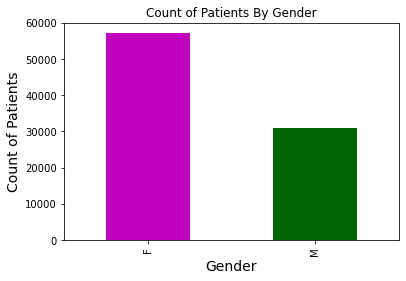

In [42]:
# Visualization showing the relationship between the Gender and the number of patients that visited the clinic

gender_visited.plot(kind="bar",color=('m','#006400'))
plt.title ('Count of Patients By Gender')
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Count of Patients',fontsize=14);




It can be inferred that 88,049 persons visited the clinic.

30,887 patients were Males and 57,162 were Females.


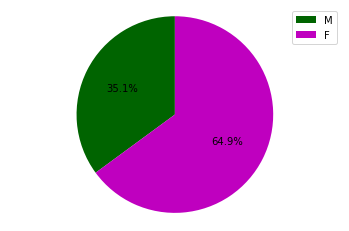

In [43]:
# Visualization showing the percentages of Males and Females that visited the clinic

labels= ['M', 'F'] 
colors=['#006400','m'] 
sizes= [male_visited.sum(),female_visited.sum()]
plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc="best")
plt.show()




Approximately 64.9% of them were Females and 35.1% were Males.



2. Neighbourhood case-study

In [55]:
# Using Visited_clinic as the metric

Get_Demograhic_Distribution(df,demographic_data,"Yes")

Please choose the metrics you want to get the distribution 
Visited_clinic
For those whose have VISITED_CLINIC is YES, these are the value_counts of the GENDER column
F    57162
M    30887
Name: GENDER, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the NEIGHBOURHOOD column
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: NEIGHBOURHOOD, Length: 80, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the AGE_BRACKET column
0-19       24708
40-59      24460
20-39      22178
60-79      14345
80-99       2354
100-119        4
Name: AGE_BRACKET, dtype: int64

------------------------------------
For thos

In [56]:
#Checking the data-set 

df.head()

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,HAS_SCHOLARSHIP,HAS_HIPERTENSION,HAS_DIABETES,TAKES_ALCOHOL,IS_HANDICAP,RECEIVED_SMS,VISITED_CLINIC,AGE_BRACKET
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,60-79
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,40-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,60-79
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes,0-19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes,40-59


In [44]:
#This shows the number of hospital locations

df['NEIGHBOURHOOD'].nunique()

81

In [45]:
#This shows the number of patients and the hospital locations they visited.

visited_hospital=visited_clinic['NEIGHBOURHOOD'].value_counts()
visited_hospital

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: NEIGHBOURHOOD, Length: 80, dtype: int64

In [46]:
#A targeted observation into the Top 20 hospital locations visited.

visited_hospital.head(20)

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
SANTA MARTHA         2622
ITARARÉ              2586
TABUAZEIRO           2554
SANTO ANTÔNIO        2261
BONFIM               2221
JESUS DE NAZARETH    2157
SANTO ANDRÉ          2058
JABOUR               2058
CARATOÍRA            1974
SÃO PEDRO            1921
NOVA PALESTINA       1859
DA PENHA             1782
ANDORINHAS           1735
ROMÃO                1733
ILHA DO PRÍNCIPE     1733
Name: NEIGHBOURHOOD, dtype: int64

In [47]:
#This shows the least 5 hospital locations visited

visited_hospital.tail()

PONTAL DE CAMBURI    57
ILHA DO BOI          32
ILHA DO FRADE         8
AEROPORTO             7
PARQUE INDUSTRIAL     1
Name: NEIGHBOURHOOD, dtype: int64

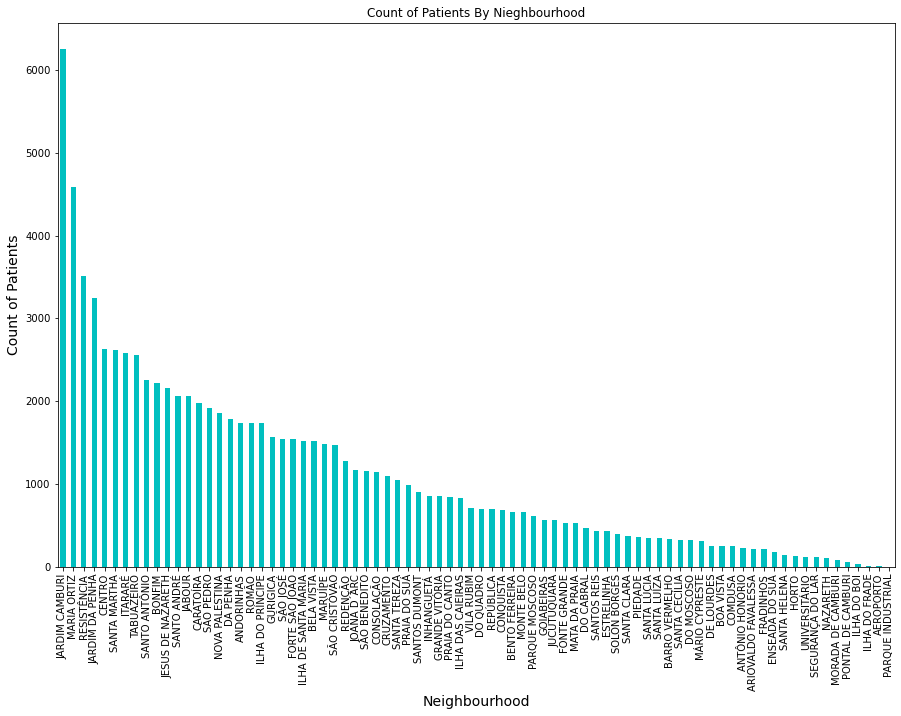

In [48]:
#A barchart showing the Hospital locations and the number of patients that visited.

visited_hospital.plot(kind="bar",figsize=(15,10),color='c')
plt.title ('Count of Patients By Nieghbourhood')
plt.xlabel('Neighbourhood',fontsize=14)
plt.ylabel('Count of Patients',fontsize=14);


.

It can be seen that a total of 88,049 patients visited the hospital locations assigned to them. From the analysis,it is shown that JARDIM CAMBURI had the highest number of patients as 6,252 and PARQUE INDUSTRIAL had the lowest number of patients as 1.

3. Age-Bracket case-study

In [67]:
# Using Visited_clinic as the metric

Get_Demograhic_Distribution(df,demographic_data,"Yes")

Please choose the metrics you want to get the distribution 
Visited_clinic
For those whose have VISITED_CLINIC is YES, these are the value_counts of the GENDER column
F    57162
M    30887
Name: GENDER, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the NEIGHBOURHOOD column
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: NEIGHBOURHOOD, Length: 80, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the AGE_BRACKET column
0-19       24708
40-59      24460
20-39      22178
60-79      14345
80-99       2354
100-119        4
Name: AGE_BRACKET, dtype: int64

------------------------------------
For thos

In [68]:
df.head()

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,HAS_SCHOLARSHIP,HAS_HIPERTENSION,HAS_DIABETES,TAKES_ALCOHOL,IS_HANDICAP,RECEIVED_SMS,VISITED_CLINIC,AGE_BRACKET
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,60-79
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,40-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,60-79
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes,0-19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes,40-59


The table below shows the statistical properties of the Age column.
For exampe, the minimum,maximum,mean and standard deviation of the Ages in the data-set.

In [49]:
# Checking to see mimimum and maximum Age

df.describe()

,PATIENTID,APPOINTMENTID,AGE
count,1.103270e+05,1.103270e+05,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753
std,2.561388e+14,7.129883e+04,23.098052
min,3.921784e+04,5.030230e+06,0.000000
25%,4.174584e+12,5.640278e+06,18.000000
50%,3.175389e+13,5.680567e+06,37.000000
75%,9.439381e+13,5.725508e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


In [50]:
# Shows the number of patients that visited the clinic with respect to their Age-brackets

agerange_visited= visited_clinic['AGE_BRACKET'].value_counts()
agerange_visited

0-19       24708
40-59      24460
20-39      22178
60-79      14345
80-99       2354
100-119        4
Name: AGE_BRACKET, dtype: int64

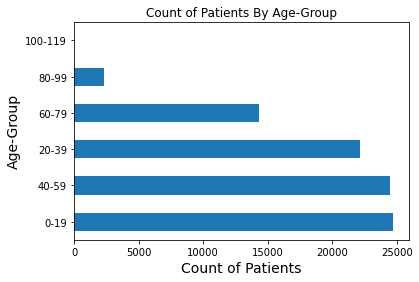

In [51]:
# A chart showing the Count of Patients that visited the clinin by Age-Group

agerange_visited.plot(kind="barh")
plt.title ('Count of Patients By Age-Group')
plt.xlabel('Count of Patients',fontsize=14)
plt.ylabel('Age-Group',fontsize=14);




It can be seen that most visits were recorded by the Age-groups [0-19] and [40-59].

4. Handicap case-study 

In [81]:
# Using Visited_clinic as the metric

Get_Demograhic_Distribution(df,demographic_data,"Yes")

Please choose the metrics you want to get the distribution 
Visited_clinic
For those whose have VISITED_CLINIC is YES, these are the value_counts of the GENDER column
F    57162
M    30887
Name: GENDER, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the NEIGHBOURHOOD column
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: NEIGHBOURHOOD, Length: 80, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the AGE_BRACKET column
0-19       24708
40-59      24460
20-39      22178
60-79      14345
80-99       2354
100-119        4
Name: AGE_BRACKET, dtype: int64

------------------------------------
For thos

In [55]:
# Number of Handicap Patients

Ishandicap= visited_clinic['IS_HANDICAP'].value_counts()
Ishandicap

No     86373
Yes     1676
Name: IS_HANDICAP, dtype: int64

In [56]:
#Total number of Handicap Patients

Ishandicap.sum()

88049

In [57]:
# Number of Handicap Patients that visited the clinic.

handicap_visited=visited_clinic['IS_HANDICAP']=='Yes'
handicap_visited.sum()

1676

In [58]:
# Number of Handicap Patients that didn't visit the clinic.

handicap_not_visited= visited_clinic['IS_HANDICAP']=='No'
handicap_not_visited.sum()

86373

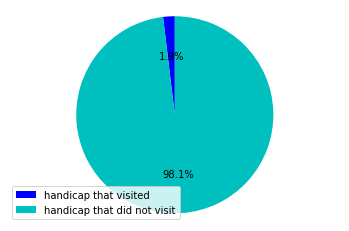

In [59]:
labels= ['handicap that visited', 'handicap that did not visit']
colors=['b','c']  
sizes= [handicap_visited.sum(),handicap_not_visited.sum()]
plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc="best")
plt.show()


Approximately 1.9% that are handicapped showed up for appointment while 98.09% didn't.

5. Received_sms case-study

In [60]:
df.head()

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,HAS_SCHOLARSHIP,HAS_HIPERTENSION,HAS_DIABETES,TAKES_ALCOHOL,IS_HANDICAP,RECEIVED_SMS,VISITED_CLINIC,AGE_BRACKET
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,60-79
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,40-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,60-79
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes,0-19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes,40-59


In [83]:
# Using Visited_clinic as the metric

Get_Demograhic_Distribution(df,demographic_data,"Yes")

Please choose the metrics you want to get the distribution 
Visited_clinic
For those whose have VISITED_CLINIC is YES, these are the value_counts of the GENDER column
F    57162
M    30887
Name: GENDER, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the NEIGHBOURHOOD column
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: NEIGHBOURHOOD, Length: 80, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the AGE_BRACKET column
0-19       24708
40-59      24460
20-39      22178
60-79      14345
80-99       2354
100-119        4
Name: AGE_BRACKET, dtype: int64

------------------------------------
For thos

In [63]:
# Number of Patients that received_sms

receivedsms= visited_clinic['RECEIVED_SMS'].value_counts()
receivedsms

No     62389
Yes    25660
Name: RECEIVED_SMS, dtype: int64

In [64]:
# Number of  Patients that received sms and visited the clinic.

receivedsms_visited=visited_clinic['RECEIVED_SMS']=='Yes'
receivedsms_visited.sum()

25660

In [65]:
# Number of Handicap Patients that received sms and didn't visit the clinic.

receivedsms_notvisited=visited_clinic['RECEIVED_SMS']=='No'
receivedsms_notvisited.sum()

62389

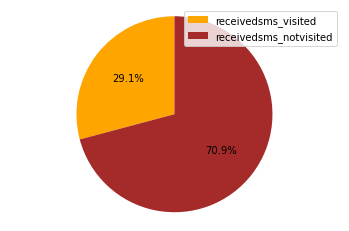

In [66]:
labels= ['receivedsms_visited', 'receivedsms_notvisited']
colors=['orange','brown']  
sizes= [receivedsms_visited.sum(),receivedsms_notvisited.sum()]
plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc="best")
plt.show()

The pie-chart shows that 70.9% received sms and didn't visited,while 29.1% received sms and visited.

6. Alcohol case-study

In [116]:
df.head()

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,HAS_SCHOLARSHIP,HAS_HIPERTENSION,HAS_DIABETES,TAKES_ALCOHOL,IS_HANDICAP,RECEIVED_SMS,VISITED_CLINIC,AGE_BRACKET
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,60-79
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,40-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,60-79
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes,0-19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes,40-59


In [124]:
# Using Visited_clinic as the metric

Get_Demograhic_Distribution(df,demographic_data,"Yes")

Please choose the metrics you want to get the distribution 
Visited_clinic
For those whose have VISITED_CLINIC is YES, these are the value_counts of the GENDER column
F    57162
M    30887
Name: GENDER, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the NEIGHBOURHOOD column
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: NEIGHBOURHOOD, Length: 80, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the AGE_BRACKET column
0-19       24708
40-59      24460
20-39      22178
60-79      14345
80-99       2354
100-119        4
Name: AGE_BRACKET, dtype: int64

------------------------------------
For thos

In [67]:
# Number of Patients that take alcohol

takesalcohol= visited_clinic['TAKES_ALCOHOL'].value_counts()
takesalcohol

No     85372
Yes     2677
Name: TAKES_ALCOHOL, dtype: int64

In [68]:
# Number of Patients that take alcohol and visited the clinic.

takesalcohol_visited=visited_clinic['TAKES_ALCOHOL']=='Yes'
takesalcohol_visited.sum()

2677

In [69]:
# Number of Patients that take alcohol and didn't visit the clinic.

takesalcohol_notvisited=visited_clinic['TAKES_ALCOHOL']=='No'
takesalcohol_notvisited.sum()

85372

The above shows that 85,372 patients that take alcohol didn't visit the clinic, while 2,677 patients that take alcohol visited the clinic.

7. Diabetes case-study

In [132]:
df.head()

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,HAS_SCHOLARSHIP,HAS_HIPERTENSION,HAS_DIABETES,TAKES_ALCOHOL,IS_HANDICAP,RECEIVED_SMS,VISITED_CLINIC,AGE_BRACKET
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,60-79
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,40-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,60-79
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes,0-19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes,40-59


In [131]:
# Using Visited_clinic as the metric

Get_Demograhic_Distribution(df,demographic_data,"Yes")

Please choose the metrics you want to get the distribution 
Visited_clinic
For those whose have VISITED_CLINIC is YES, these are the value_counts of the GENDER column
F    57162
M    30887
Name: GENDER, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the NEIGHBOURHOOD column
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: NEIGHBOURHOOD, Length: 80, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the AGE_BRACKET column
0-19       24708
40-59      24460
20-39      22178
60-79      14345
80-99       2354
100-119        4
Name: AGE_BRACKET, dtype: int64

------------------------------------
For thos

In [71]:
# Number of Patients that have diabetes

hasdiabetes= visited_clinic['HAS_DIABETES'].value_counts()
hasdiabetes

No     81571
Yes     6478
Name: HAS_DIABETES, dtype: int64

In [72]:
# Number of Patients that have diabetes and visited the clinic.

hasdiabetes_visited=visited_clinic['HAS_DIABETES']=='Yes'
hasdiabetes_visited.sum()

6478

In [73]:
# Number of Patients that have diabetes and didn't visit the clinic.

hasdiabetes_notvisited=visited_clinic['HAS_DIABETES']=='No'
hasdiabetes_notvisited.sum()

81571

In [74]:
# Percentage of patients that have diabetes and visited the clinic

hasdiabetes_visited_percent = (hasdiabetes_visited.sum() / hasdiabetes.sum()) * 100
hasdiabetes_visited_percent

7.357266976342718

In [75]:
# Percentage of patients that have diabetes and didn't visit the clinic

hasdiabetes_notvisited_percent = (hasdiabetes_notvisited.sum() / hasdiabetes.sum()) * 100
hasdiabetes_notvisited_percent

92.64273302365729

The above shows that only about 7.4% of patients that have diabetes visited the clinic.

8. Scholarship case-study

In [137]:
# Using Visited_clinic as the metric

Get_Demograhic_Distribution(df,demographic_data,"Yes")

Please choose the metrics you want to get the distribution 
Visited_clinic
For those whose have VISITED_CLINIC is YES, these are the value_counts of the GENDER column
F    57162
M    30887
Name: GENDER, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the NEIGHBOURHOOD column
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: NEIGHBOURHOOD, Length: 80, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the AGE_BRACKET column
0-19       24708
40-59      24460
20-39      22178
60-79      14345
80-99       2354
100-119        4
Name: AGE_BRACKET, dtype: int64

------------------------------------
For thos

In [138]:
df.head()

,PATIENTID,APPOINTMENTID,GENDER,SCHEDULEDDAY,APPOINTMENTDAY,AGE,NEIGHBOURHOOD,HAS_SCHOLARSHIP,HAS_HIPERTENSION,HAS_DIABETES,TAKES_ALCOHOL,IS_HANDICAP,RECEIVED_SMS,VISITED_CLINIC,AGE_BRACKET
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,Yes,60-79
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,Yes,40-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,Yes,60-79
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,Yes,0-19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,Yes,40-59


In [76]:
# Number of Patients that have scholarship

hasscholarship= visited_clinic['HAS_SCHOLARSHIP'].value_counts()
hasscholarship

No     79783
Yes     8266
Name: HAS_SCHOLARSHIP, dtype: int64

In [77]:
# Number of Patients that have scholarship and visited the clinic

hasscholarship_visited=visited_clinic['HAS_SCHOLARSHIP']=='Yes'
hasscholarship_visited.sum()

8266

In [78]:
# Number of Patients that have scholarship and didn't visit the clinic.

hasscholarship_notvisited=visited_clinic['HAS_SCHOLARSHIP']=='No'
hasscholarship_notvisited.sum()

79783

In [79]:
# Percentage of Patients that have scholarship and visited

hasscholarship_visited_percent = (hasscholarship_visited.sum() / hasscholarship.sum()) * 100
hasscholarship_visited_percent

9.387954434462628

In [80]:
# Percentage of Patients that have scholarship and didn't visit

hasscholarship_notvisited_percent = (hasscholarship_notvisited.sum() / hasscholarship.sum()) * 100
hasscholarship_notvisited_percent

90.61204556553737

The above analysis shows that about 9.38% of patients that are under scholarship visited the clinic

9. Hipertension case-study

In [86]:
# Using Visited_clinic as the metric

Get_Demograhic_Distribution(df,demographic_data,"Yes")

Please choose the metrics you want to get the distribution 
Visited_clinic
For those whose have VISITED_CLINIC is YES, these are the value_counts of the GENDER column
F    57162
M    30887
Name: GENDER, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the NEIGHBOURHOOD column
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3517
JARDIM DA PENHA      3241
CENTRO               2629
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: NEIGHBOURHOOD, Length: 80, dtype: int64

------------------------------------
For those whose have VISITED_CLINIC is YES, these are the value_counts of the AGE_BRACKET column
0-19       24708
40-59      24460
20-39      22178
60-79      14345
80-99       2354
100-119        4
Name: AGE_BRACKET, dtype: int64

------------------------------------
For thos

In [81]:
# Number of Patients that have hipertension

hashipertension= visited_clinic['HAS_HIPERTENSION'].value_counts()
hashipertension

No     70081
Yes    17968
Name: HAS_HIPERTENSION, dtype: int64

In [82]:
# Number of Patients that have hipertension and visited the clinic.

hashipertension_visited=visited_clinic['HAS_HIPERTENSION']=='Yes'
hashipertension_visited.sum()

17968

In [83]:
# Number of Patients that have hipertension and didn't visit the clinic.

hashipertension_notvisited=visited_clinic['HAS_HIPERTENSION']=='No'
hashipertension_notvisited.sum()

70081

In [84]:
# Percentage of patients that have hipertension and visited the clinic

hashipertension_visited_percent = (hashipertension_visited.sum() / hashipertension.sum()) * 100
hashipertension_visited_percent

20.406818930368317

In [85]:
# Percentage of patients that have hipertension and didn't visit the clinic

hashipertension_notvisited_percent = (hashipertension_notvisited.sum() / hashipertension.sum()) * 100
hashipertension_notvisited_percent

79.59318106963168

The analysis above shows that 20.4% of patients that have hipertension visited the clinic.

<a id='conclusions'></a>
## Conclusions


* It can be inferred that 88,049 persons visited the clinic. Approximately 64.9% of them were Females and 35.1% were Males. This implies that Gender is an important factor to consider and the Female gender will most likely show up for appointments.


* From the analysis, a large percentage of alcoholic patients will not show at their respective clinics.


* It is shown that JARDIM CAMBURI had the highest number of patients as 6,252 and PARQUE INDUSTRIAL had the lowest number of patients as 1.


* It can be seen that most visits were recorded by the Age-range [0,19] and [40-59]. This means these age brackets are predicted to show for appointments in future.




* From the analysis, patients under scholarship will most likely not show at their respective clinics in later times.


* SMS is an important factor to consider. And it is safe to say that patients that receive SMS will most likely not visit their respective clinics.


* From the analysis, most diabetic patients will likely not show at their respective clinics.


* The physical disability of patients is an important factor to consider if patients would show up for appointments. Approximately 98.09% that are handicapped didn't show up to clinic. This didn't come as a surprise because of the constraint involved in movement and means that the handicapped patients will most likely not show up at the clinics in subsequent times.


* Finally,all the variables treated in this data-set are important to predict if patients will show up for appointments.




#### Limitations/Challenges
* The patients home locations weren't stated.This would have aided the analysis to know the behavior of patients living closer to the clinic and patients staying afar off.

* I had to rename some Column Headers in order to properly understand the data.

* I represented 1s and 0s as Yes and No respectively. This was helpful when exploring the data-set.
